In [2]:
%matplotlib inline

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
image = np.array(Image.open('castle.jpg'))

In [5]:
image = image / 255
row, col, _ = image.shape
print "pixels: ", row, "*", col

pixels:  833 * 1250


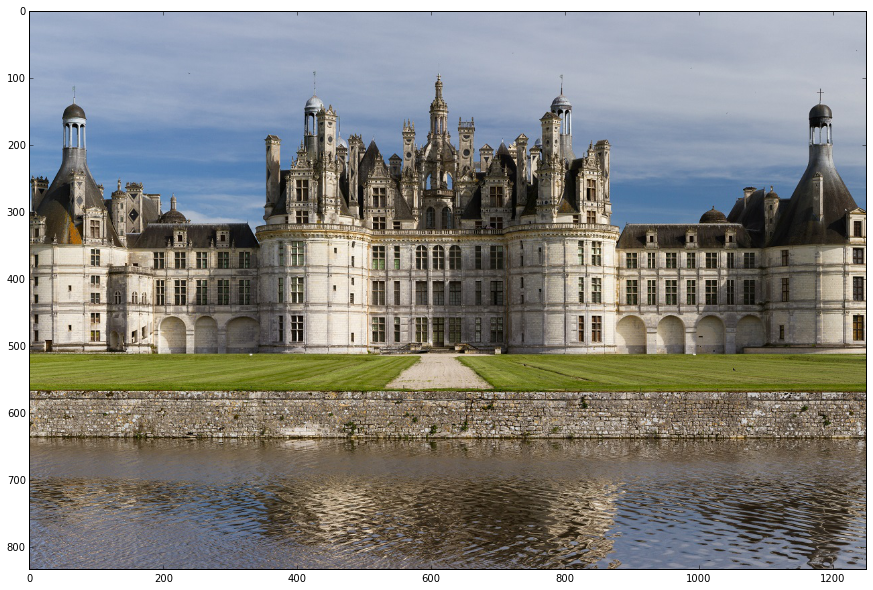

In [7]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image)
plt.show()

In [8]:
image_red = image[:, :, 0]
image_green = image[:, :, 1]
image_blue = image[:, :, 2]

In [9]:
original_bytes = image.nbytes
print "The space (in bytes) needed to store this image is", original_bytes

The space (in bytes) needed to store this image is 24990000


In [10]:
U_r, d_r, V_r = np.linalg.svd(image_red, full_matrices=True)
U_g, d_g, V_g = np.linalg.svd(image_green, full_matrices=True)
U_b, d_b, V_b = np.linalg.svd(image_blue, full_matrices=True)

In [11]:
bytes_to_be_stored = sum([matrix.nbytes for matrix in [U_r, d_r, V_r, U_g, d_g, V_g, U_b, d_b, V_b]])
print "The matrices that we store have total size (in bytes):", bytes_to_be_stored

The matrices that we store have total size (in bytes): 54173328


In [12]:
k = 50

In [13]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

In [14]:
compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r_k, d_r_k, V_r_k, U_g_k, d_g_k, V_g_k, U_b_k, d_b_k, V_b_k]])
print "The compressed matrices that we store now have total size (in bytes):", compressed_bytes

The compressed matrices that we store now have total size (in bytes): 2500800


In [16]:
ratio = compressed_bytes / original_bytes
print "The compression ratio between the original image size and the total size of the compressed factors is", ratio

 The compression ratio between the original image size and the total size of the compressed factors is 0.100072028812


In [17]:
image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

In [18]:
image_reconstructed = np.zeros((row, col, 3))

image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx

In [19]:
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

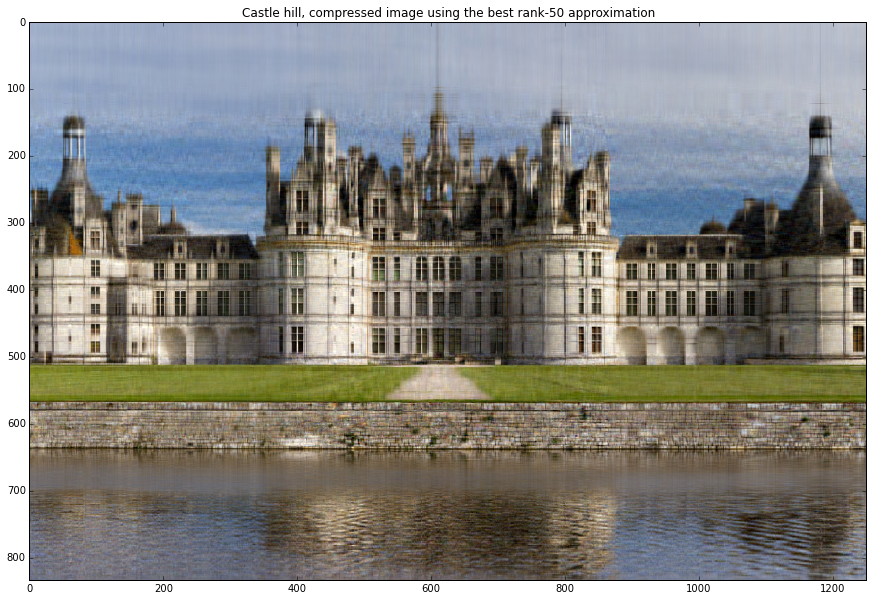

In [20]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Castle hill, compressed image using the best rank-{} approximation'.format(k))
plt.show()

In [21]:
k = 10

U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

image_reconstructed = np.zeros((row, col, 3))
image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

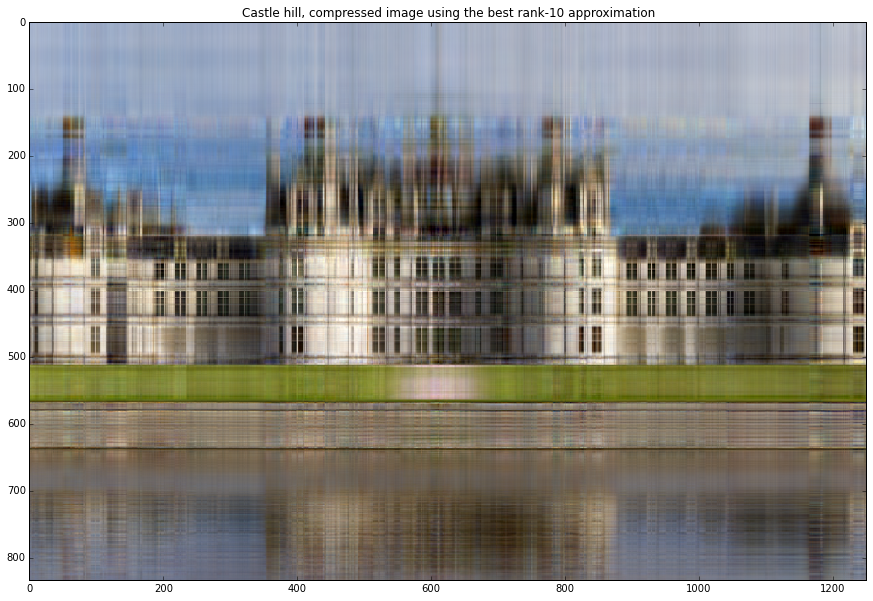

In [22]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Castle hill, compressed image using the best rank-{} approximation'.format(k))
plt.show()